In [1]:
import hashlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Decryption_fun as defun

dec = defun.complete_decryption()

%reload_ext autoreload
%autoreload 2

In [2]:
text = open("step2.txt").read()

d = dec.letter_freqs(text)

<BarContainer object of 26 artists>

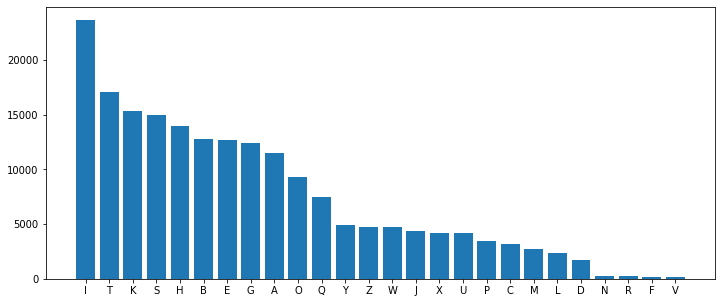

In [3]:
plt.figure(figsize = (12,5))
plt.bar(x = pd.Series(d).sort_values(ascending = False).index,
        height = pd.Series(d).sort_values(ascending = False))

In [4]:
corpus = open("corpus2.txt").read()
c = dec.letter_freqs(corpus)

<BarContainer object of 26 artists>

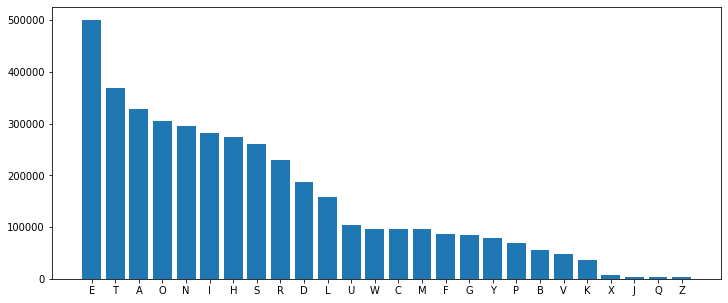

In [5]:
plt.figure(figsize = (12,5))
plt.bar(x = pd.Series(c).sort_values(ascending = False).index,
        height = pd.Series(c).sort_values(ascending = False))

In [6]:
# Frequency analysis function

def freq_analysis(text):
    """
    Returns a string of the alphabet letters with len == 26,
    arranged in order of most frequently occurring in the input text.
    It is based on the "cipher_freqs" function.
    """
    # Recap the frequencies in the cipher (K letters, V frequencies)
    letterToFreq = dec.letter_freqs(text)

    # The dictionary is then converted to a list of tuples
    # (letter, frequency) that are sorted according to frequency    
    freqPairs = list(letterToFreq.items())
    freqPairs.sort(key = lambda x:x[1], reverse = True)
    
    # The final string is created in such a way that
    # letter sare ordered by frequency
    freqOrder = [pair[0] for pair in freqPairs]    

    return ''.join(freqOrder)

In [7]:
CORPUS = freq_analysis(corpus)
CORPUS

'ETAONIHSRDLUWCMFGYPBVKXJQZ'

In [8]:
First_Key = freq_analysis(text)
First_Key

'ITKSHBEGAOQYZWJXUPCMLDNRFV'

In [9]:
# Find the first candidate plain text, based only on the frequency analysis
s2 = open("step2.txt", encoding = "utf-8").read()

first_candidate = dec.decrypter(First_Key, s2) ###
first_candidate[:500]

'SCARWEDCHTICELLPROVHSHONEDSUTLERSANDAUSTRHANQECSOFFERHNGALLSORTSOFTEWPTHNGCARESTIEPVLOGRADSIELDFEASTAFTERFEASTMELEBRATHNGACARDSTIEYIADREMEHVEDFORTIEMAWPAHGNANDWADEEXPEDHTHONSTOOLWTJTOVHSHTAMERTAHNMAROLHNETIEIUNGARHANCIOIADREMENTLYOPENEDARESTAURANTTIERECHTIGHRLSASCAHTRESSESROSTVCIOIADQUSTMELEBRATEDIHSPROWOTHONTOAMORNETMYANDBOUGITDENSOVSIORSEBEDOUHNCASHNDEBTALLROUNDTOIHSMOWRADESANDTIESUTLERSONREMEHVHNGBORSLETTERIERODECHTIAFELLOCOFFHMERTOOLWTJDHNEDTIEREDRANKABOTTLEOFCHNEANDTIENSETOFFALONETOTIEGUARD'

In [10]:
# Dictionary of bigrams ordered by score,
# using the function in the class
Corpus_BI_freq = dec.bigram_analysis(corpus)
Decr_BI_freq = dec.bigram_analysis(first_candidate)

In [11]:
# FIND ALL THE PERMUTATIONS OF BIGRAMS IN THE KEY PREVIOUSLY OBTAINED
#from itertools import permutations
#perms = [''.join(p) for p in permutations(First_Key, r = 2)]

# Swap the couple of letters for every bigram of "perms", but checking
# that the letters in the bigram do not occur in the same order in First_Key
# otherwise the swapping only produces duplicates.

#Many_Keys = dec.swapper(First_Key, perms)
#len(pd.Series(Many_Keys))

In [12]:
def candidate_plain_score(t):
    
    # Recall the previous function to generate a
    # dict and get only the list of the keys
    cand_BI_freq = dec.bigram_analysis(t)
    Corpus_BI_freq = dec.bigram_analysis(corpus)
    
    bigrams_in_cand = list(cand_BI_freq.keys())

    # Get the score (log(freq)) of the bigrams in the corpus
    # for every bigram found in the candidate plaintext.
    # Added a check (if) for those bigrams that are not in the corpus
    scores_corpus_bigrams_in_cand = [Corpus_BI_freq[bi] for bi in bigrams_in_cand
                                     if bi in Corpus_BI_freq.keys()]

    # Assign to every bigram of the candidate plaintext
    # the score that that biagram has in the corpus
    dict_scores_corpus_bigrams_in_cand = dict(zip(bigrams_in_cand,
                                                  scores_corpus_bigrams_in_cand))

    # The overall score of the candidate plain text is
    # computed as the sum of all the values in the above dict
    return sum(dict_scores_corpus_bigrams_in_cand.values())

In [13]:
First_Score = candidate_plain_score(first_candidate)
print( First_Score )

4110.007051439999


In [14]:
def key_improver(k):
    """
    This function gets the first key as an input. Then, for every character
    in the key, it swaps that character with the following one and stores
    the new key.
    
    Then, for every key found, the score of that key is compared with the
    one obtained with the first key. The output of the function will finally
    be a list of tuples (number of iteration, key) of only those keys that
    produce a better score than the first key.
    """
    F_Key_L = list(k)
    List_swap = []
    for n in range(len(F_Key_L)-1):
        F_Key_L2 = F_Key_L.copy()
        # swapping (item assigment) is not possible for string, so we used a list
        F_Key_L2[n], F_Key_L2[n+1] = F_Key_L2[n+1], F_Key_L2[n]
        List_swap += [ "".join(F_Key_L2) ]
    
    First_Score = candidate_plain_score(first_candidate)
    best_from_swap = []
    for e, nk in enumerate(List_swap): # keep the iteration number and the key
        new_try = dec.decrypter(nk, s2)
        new_score = candidate_plain_score(new_try)
        if new_score > First_Score: # winning scores
            best_from_swap += [ (e, nk) ] # return list of tuples
        else:
            continue
    """
    RECURSIVE ATTEMPT
    for nk in List_swap: #for e, nk in enumerate(List_swap):
        new_try = dec.decrypter(nk, s2)
        new_score = candidate_plain_score(new_try)
        if new_score > First_Score:
            print(nk)
            #best_from_swap += [ nk ]
            #improved_key = key_improver(nk)
            return key_improver(nk)
    """
            
    return best_from_swap

In [15]:
Best_Iteration_Swap = key_improver(First_Key)
Best_Iteration_Swap

[(5, 'ITKSHEBGAOQYZWJXUPCMLDNRFV'),
 (7, 'ITKSHBEAGOQYZWJXUPCMLDNRFV'),
 (12, 'ITKSHBEGAOQYWZJXUPCMLDNRFV'),
 (13, 'ITKSHBEGAOQYZJWXUPCMLDNRFV'),
 (14, 'ITKSHBEGAOQYZWXJUPCMLDNRFV'),
 (23, 'ITKSHBEGAOQYZWJXUPCMLDNFRV'),
 (24, 'ITKSHBEGAOQYZWJXUPCMLDNRVF')]

In [16]:
TRUE_KEY = "ITKSHEBGAOQYWJZXUPCMLDNFVR"

In [17]:
# In this chunk, given the output from the previous one,
# we now generate all the permutations of the improving swaps
# (5,7,12,13,14,23,24). So every substring, will generate len(substring)! permutations.
# In practice, we've created for lists of length 2!, 2!, 4!, 3!

from itertools import permutations

perms_5_6 = [''.join(p) for p in permutations(First_Key[5]+First_Key[6])]
perms_7_8 = [''.join(p) for p in permutations(First_Key[7]+First_Key[8])]
perms_12_13_14_15 = [''.join(p) for p in permutations(First_Key[12:16])]
perms_23_24_25 = [''.join(p) for p in permutations(First_Key[23:26])]

print(len(perms_5_6),len(perms_7_8),len(perms_12_13_14_15),len(perms_23_24_25),sep = " // ")

# --------------------------------------------------------------------------
# From these sublists, we've replace that part of the initial key
# in order to create a list that has all the combinations of substrings
# that we've just generated.

# The result is a list, whose length is (2*2*24*6) and to which
# the elements that are equal to First_Key are removed (actually only one
# according to combination definition)

next_step_keys = []
for s in perms_5_6:
    for t in perms_7_8:
        for u in perms_12_13_14_15:
            for v in perms_23_24_25:
                next_step_keys += [ First_Key[:5] + s + t + First_Key[9:12] + u + First_Key[16:23] + v]
                
next_step_keys = [x for x in next_step_keys if x != First_Key]
# converted to lowercase, since the ciphertext is in lowercase as well!

2 // 2 // 24 // 6


In [18]:
if TRUE_KEY in next_step_keys: print("YOU ARE GETTING CLOSER!")

YOU ARE GETTING CLOSER!


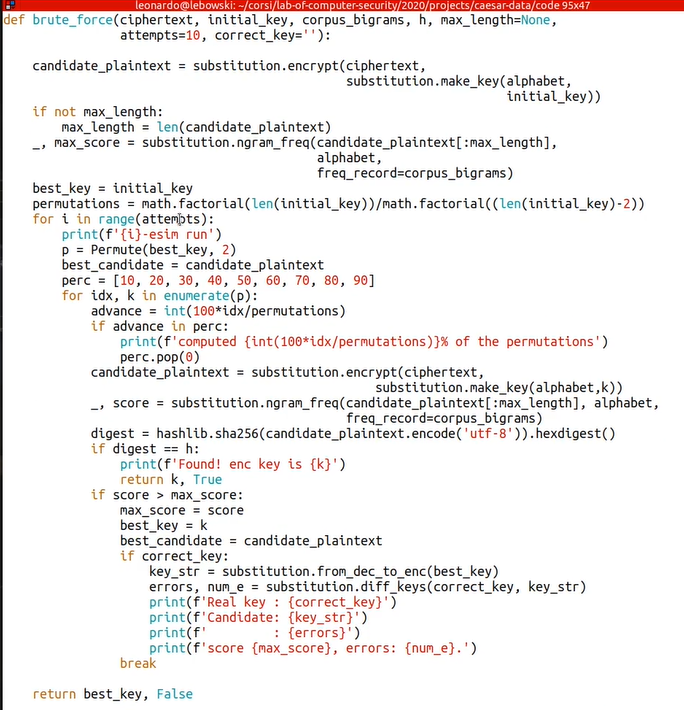

In [19]:
ciphertext = open("ciphertext.txt").read()
ciphertext[:500]

'gwkazio wetb wiqq-caslegeshio gytqiag kho kygtaekh fiwg sxxiaehu\nkqq gsatg sx tizctehu wkaig. tbi clqsuakog biqo xikgt kxtia xikgt,\njiqimaktehu kwkaog tbip bko aijielio xsa tbi jkzckeuh, kho zkoi\nincioeteshg ts sqztr ts leget k jiatkeh jkasqehi tbi byhukaekh,\nwbs bko aijihtqp scihio k aigtkyakht tbiai wetb ueaqg kg wketaiggig.\nasgtl, wbs bko fygt jiqimaktio beg caszstesh ts k jsahitjp kho msyubt\noihgslg bsagi, miosyeh, wkg eh oimt kqq asyho, ts beg jszakoig kho\ntbi gytqiag. sh aijielehu msag qit'

In [20]:
# Hash to compare our result with
true_digest = open("sha256sum.txt").read()

def brute_force(key0, list_of_keys, correct_hash):
    """
    This function, starting from the initial key found from frequency
    analysis on letters, iterates for every element of the list of new
    keys found in order to detect the right hash (in the first place),
    or at least to find an improvement of the original key.
    
    If the hash is found the function interrupts the loop and returns
    the right key, otherwise it returns the improvement found.
    """
    best_key = key0
    best_cand = dec.decrypter( key0, s2 )
    max_score = candidate_plain_score(best_cand)
    for key in list_of_keys:
        candidate = dec.decrypter( key, s2 )
        score = candidate_plain_score( candidate )
        candidate_for_hash = dec.ciphertext_decrypter(key, ciphertext) # to get the hask check right
        # we are sure that encoding is "utf-8" after professor Maccari's tutorial
        utf8_dig = hashlib.sha256( bytes(candidate_for_hash, "utf-8") ).hexdigest()
        if utf8_dig == correct_hash:
            return key
        elif score > max_score:
            max_score = score
            best_key = key
            best_cand = candidate
    return best_key.lower()

In [21]:
best_key_found = brute_force(First_Key, next_step_keys, true_digest)
print( best_key_found )
print( best_key_found == First_Key )
print( best_key_found == TRUE_KEY )

ITKSHEBGAOQYWJZXUPCMLDNFVR
False
True


In [22]:
best_cand = dec.ciphertext_decrypter(best_key_found.lower(), ciphertext)
best_cand[:500]

'swarmed with well-provisioned sutlers and austrian jews offering\nall sorts of tempting wares. the pvlograds held feast after feast,\ncelebrating awards they had received for the campaign, and made\nexpeditions to olmtz to visit a certain caroline the hungarian,\nwho had recently opened a restaurant there with girls as waitresses.\nrostv, who had just celebrated his promotion to a cornetcy and bought\ndensovs horse, bedouin, was in debt all round, to his comrades and\nthe sutlers. on receiving bors let'